$ \Huge{Statistics \quad for \quad Data \quad Science \quad 1} $

All examples from *How to Design and Report Experiments* by Andy Field & Graham Hole - ISBN 978-0-7619-7383-6

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# What we will talk about:

- descriptive statistics (week 14)
- dimensionality reduction (week 14)
- cluster analysis (week 14)
- inferential statistics (week 15)
- parametric statistics (week 15)
- non-parametric statistics (week 15)
- choosing a statistical test (week 15)

# Descriptive Statistics

### Popuplations vs Samples

- what are populations and samples?

### Summarizing Data

- when summarizing data, we often calculate a summary or make a chart

In [2]:
# observations of number of *amphetamine psychosis* per day

h = [10, 6, 7, 8, 9, 7, 10, 2, 6, 8, 
     3, 9, 8, 10, 1, 5, 8, 4, 2, 9, 
     10, 6, 7, 8, 9, 7, 10, 2, 6, 8, 
     3, 9, 8, 10, 1, 5, 8, 4, 2, 9]

In [3]:
h_sorted = h.copy()
h_sorted.sort()

In [4]:
h_df = pd.DataFrame(h)

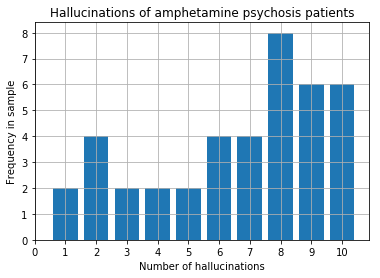

In [5]:
h_hist = h_df.hist(bins=np.arange(0.5, 11.5, 1.0), rwidth=0.8)
plt.title('Hallucinations of amphetamine psychosis patients')
plt.xlabel('Number of hallucinations')
plt.ylabel('Frequency in sample')
plt.xticks(range(11))
plt.show()

In [6]:
# The mode: most frequent observation
h_df.mode()

,0
0,8


In [7]:
# The median: the center element
h_df.median()

0    7.5
dtype: float64

In [8]:
# The mean
h_df.mean()

0    6.6
dtype: float64

The mean is defined as: $\mu = \overline{x} = \frac{\sum{x}}{n}$

In [9]:
# The variance
h_df.var()

0    8.041026
dtype: float64

The variance is defined as: 

$\sigma = \frac{\sum{(x_i - \mu)}^2}{n}$ for samples (degrees of freedom is 0),

$s^2 = \frac{\sum{(x_i - \mu)}^2}{n - 1}$ for populations (degrees of freedom is 1)

In [10]:
h_df.var(ddof=0)

0    7.84
dtype: float64

In [11]:
h_df.var(ddof=1)

0    8.041026
dtype: float64

In [12]:
# The standard deviation
h_df.std()

0    2.83567
dtype: float64

The standard deviation is defined as: 

$s = \sqrt{\frac{\sum{(x_i - \mu)}^2}{n}}$

$s = \sqrt{\frac{\sum{(x_i - \mu)}^2}{n - 1}}$

In [13]:
# The standard error of the mean- for degrees of freedom 1
h_df.sem()

0    0.448359
dtype: float64

Standard error of the mean is defined as:

$\sigma_\mu = \frac{\mu}{\sqrt{n}}$

Statistics is most often communicated as one or a few numbers out of context. That is useless.

Instead, it should be communicated in a proper context:

- The number of units drunk before snogging Ben the Labrador was 10.00 units (SE=1.22)
- On average the Labradors had to be given 26.65 units of alcohol (SE=3.42) before they would play tonsil hockey with any of the blokes.

Or even better:

- Women needed substantially more units of alcohol (M=17.24, SE=2.53) than men (M=10.00, SE=1.22) before they would exchange saliva with a Labrador.
- Although Labradors would lick the participant's feet after very little alcohol (M=0.28, SE=0.11), they needed considerably more before they would do the tongue tango with the men (M=26.65, SE=3.42).

# Dimensionality Reduction

Dimensionality reduction are mainly used for:

- visualization
- compression

## Principal Component Analysis

PCA is an effective way of doing dimensionality reduction.

PCA envolves matrix calculus, but fortunately Numpy will do all the work for us.

We start by finding the covariance matrix $\Sigma$ (that is *sigma*, not sum):

$\Sigma = \frac{1}{m}X^T X$

We then use *singular value decomposition* to compute the principal components of $U$, using Numpy:

$U, S, V = np.linalg.svd(Sigma)$

Then we can compute the projection of $Z$ of $X$ onto $k$ dimensions:

$Z = X U_k$

In [ ]:
# basic implementation of PCA

def pca(X, k):
    assert(type(X) == np.ndarray)
    assert(type(k) == int)
    # m: number of samples, n: number of features
    m, n = X.shape
    Sigma = (1/float(m)) * (X.T.dot(X))
    U, S, V = np.linalg.svd(Sigma)
    U = U[:, 0:k]
    Z = X.dot(U)
    return Z

# Cluster Analysis

Pseudo-code for K-Means: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.33.9202&rep=rep1&type=pdf

# Assignment 1

Based on the attendance dataset:

- describe the dataset using descriptive statistics
- make an implementation of K-Means and identify clusters of students in the dataset
- use PCA dimensionality reduction to visualize the dataset

Summarize your findings in a presentation - prepare a 5 min presentation.